In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In the original dataset, there are failed 8860, successful 4575, canceled 1872, suspended 167

In [93]:
df = pd.read_excel('../data/Kickstarter.xlsx')
df = df[(df['state'] == 'successful') | (df['state'] == 'failed')]

# # convert goal to usd
df['goal'] = df['goal']*df['static_usd_rate']
df['pledged'] = df['pledged']*df['static_usd_rate']

# drop all columns that does not exist at the launch of a project
df.drop(['pledged','backers_count','state_changed_at','staff_pick',
         'backers_count','spotlight',
         'usd_pledged',
         'state_changed_at_month',
         'state_changed_at_day','state_changed_at_yr',
         'state_changed_at_hr','launch_to_state_change_days'
         ],axis=1,inplace=True)



# # drop columns for curerncy conversion
df.drop(['static_usd_rate','currency'],axis=1,inplace=True)

# # drop all columns that have the same value
df.drop(['disable_communication'],axis=1,inplace=True)

# # drop deadline_at, state_change_at, created_at, launched_at since the pre-processing is already done in other columns
df.drop(['deadline','created_at','launched_at'], axis=1, inplace=True)

df['category'].fillna('Unknown', inplace=True)

df.head()

,id,name,goal,state,country,category,name_len,name_len_clean,blurb_len,blurb_len_clean,...,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,21449.83740,failed,GB,Gadgets,8.0,8.0,18.0,14.0,...,12,18,2015,3,2,18,2016,9,62,30
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartM...,10034.45163,successful,DE,Unknown,9.0,6.0,23.0,15.0,...,2,8,2016,9,2,18,2016,8,9,45
4,1315415013,help send Object Collection to Norway!,2000.00000,successful,US,Experimental,6.0,5.0,19.0,13.0,...,2,16,2016,10,2,18,2016,7,1,14
5,836821539,The Tragedy of Mario and Juliet,3000.00000,successful,US,Plays,6.0,4.0,19.0,14.0,...,1,27,2016,17,2,18,2016,4,21,60
6,2077265745,Timepiece Pulu,35000.00000,failed,US,Gadgets,2.0,2.0,20.0,15.0,...,1,24,2016,23,2,17,2016,21,23,37


Check there is no project created later than launched date. If the project is on spotlight, the project is 100% successful. There are 4575 projects that are successful. 

In [64]:
df.describe()

,id,goal,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,deadline_day,deadline_yr,deadline_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days
count,1.343500e+04,1.343500e+04,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000
mean,1.072567e+09,9.107229e+04,5.804466,5.147897,19.061035,13.069967,6.789133,15.671678,2014.353703,13.055899,6.534723,15.535541,2014.151321,12.877112,6.609081,15.305024,2014.275102,12.599107,46.746185,34.445032
std,6.156898e+08,1.520810e+06,2.835594,2.413875,4.545389,3.177685,3.411852,9.047913,1.128792,6.072346,3.301920,8.764973,1.137403,5.884579,3.356524,8.801823,1.123902,5.596640,101.006404,11.936018
min,1.645550e+05,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,1.000000
25%,5.489060e+08,3.500000e+03,3.000000,3.000000,17.000000,11.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,30.000000
50%,1.074059e+09,1.109928e+04,6.000000,5.000000,20.000000,13.000000,7.000000,15.000000,2015.000000,13.000000,7.000000,15.000000,2014.000000,13.000000,7.000000,15.000000,2015.000000,13.000000,14.000000,30.000000
75%,1.605931e+09,3.999950e+04,8.000000,7.000000,22.000000,15.000000,10.000000,23.000000,2015.000000,18.000000,9.000000,23.000000,2015.000000,17.000000,9.000000,23.000000,2015.000000,17.000000,43.000000,39.000000
max,2.147017e+09,1.000000e+08,16.000000,14.000000,35.000000,30.000000,12.000000,31.000000,2016.000000,23.000000,12.000000,31.000000,2016.000000,23.000000,12.000000,31.000000,2016.000000,23.000000,1528.000000,91.000000


In [65]:
df.head()

,id,name,goal,state,disable_communication,country,category,name_len,name_len_clean,blurb_len,...,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,21449.83740,failed,False,GB,Gadgets,8.0,8.0,18.0,...,12,18,2015,3,2,18,2016,9,62,30
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartM...,10034.45163,successful,False,DE,NaN,9.0,6.0,23.0,...,2,8,2016,9,2,18,2016,8,9,45
4,1315415013,help send Object Collection to Norway!,2000.00000,successful,False,US,Experimental,6.0,5.0,19.0,...,2,16,2016,10,2,18,2016,7,1,14
5,836821539,The Tragedy of Mario and Juliet,3000.00000,successful,False,US,Plays,6.0,4.0,19.0,...,1,27,2016,17,2,18,2016,4,21,60
6,2077265745,Timepiece Pulu,35000.00000,failed,False,US,Gadgets,2.0,2.0,20.0,...,1,24,2016,23,2,17,2016,21,23,37


In [67]:
df.isna().sum()

id                             0
name                           1
goal                           0
state                          0
country                        0
category                    1254
name_len                       0
name_len_clean                 0
blurb_len                      0
blurb_len_clean                0
deadline_weekday               0
state_changed_at_weekday       0
created_at_weekday             0
launched_at_weekday            0
deadline_month                 0
deadline_day                   0
deadline_yr                    0
deadline_hr                    0
created_at_month               0
created_at_day                 0
created_at_yr                  0
created_at_hr                  0
launched_at_month              0
launched_at_day                0
launched_at_yr                 0
launched_at_hr                 0
create_to_launch_days          0
launch_to_deadline_days        0
dtype: int64

In [88]:
df[df['launched_at_yr']!=df['created_at_yr']]

,id,name,goal,pledged,state,country,state_changed_at,staff_pick,backers_count,usd_pledged,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,21449.8374,8484.125686,failed,GB,2016-03-19 09:31:32,False,66,8484.125686,...,18,2015,3,2,18,2016,9,62,30,30
17,1523306227,Chill Cocktail Ice Theater Project,35000.0000,0.000000,failed,US,2016-04-17 13:52:02,False,0,0.000000,...,29,2015,22,2,17,2016,13,49,60,60
28,277986632,Keep the Festival Free!,5500.0000,790.000000,failed,US,2016-04-09 21:09:51,False,17,790.000000,...,23,2015,17,2,16,2016,21,146,53,53
29,1413963323,Help Teachers Trade Stuff with Other Teachers,3200.0000,101.000000,failed,US,2016-03-17 21:01:48,False,2,101.000000,...,21,2015,11,2,16,2016,21,360,30,30
34,2086831645,Stomp Key,60000.0000,838.000000,failed,US,2016-03-17 15:12:46,False,32,838.000000,...,7,2015,12,2,16,2016,15,71,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15215,1613139526,"Tagli.us, a new social alternative to deliciou...",5820.0000,926.000000,failed,US,2011-02-01 21:27:36,False,21,926.000000,...,29,2010,23,1,2,2011,21,3,30,30
15216,1381711170,Modular Desktop CNC Machine,10000.0000,47608.000000,successful,US,2011-02-15 14:23:04,False,69,47608.000000,...,16,2010,17,1,1,2011,14,15,45,45
15354,1751153745,velosynth,500.0000,1560.000000,successful,US,2010-07-02 18:00:13,True,17,1560.000000,...,9,2009,19,6,17,2010,22,190,14,14
15393,1537663234,Hollaback!,12500.0000,13560.000000,successful,US,2010-05-28 16:00:11,False,356,13560.000000,...,10,2009,11,4,19,2010,13,191,39,39


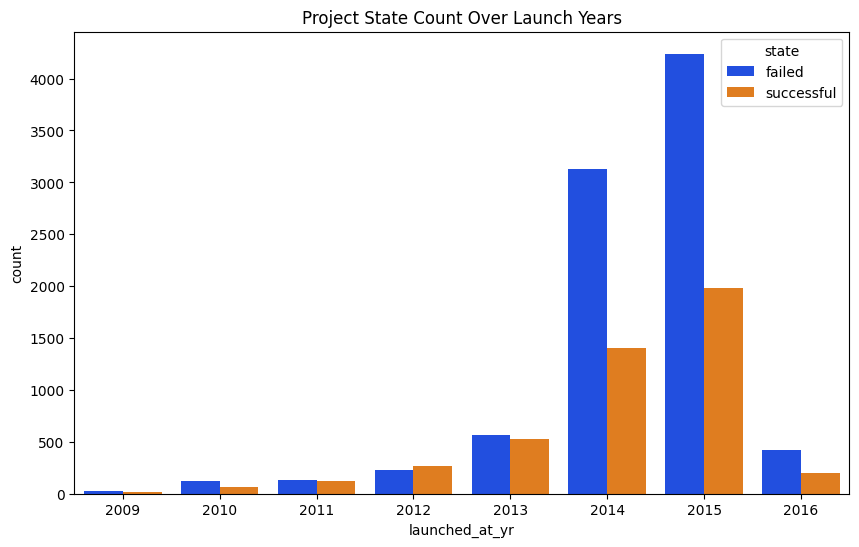

In [69]:
counts = df.groupby(['state','launched_at_yr']).count()['id'].reset_index()
counts = counts.rename(columns={'id':'count'})
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='launched_at_yr', y='count', hue='state', palette='bright')
plt.title('Project State Count Over Launch Years')
plt.show()

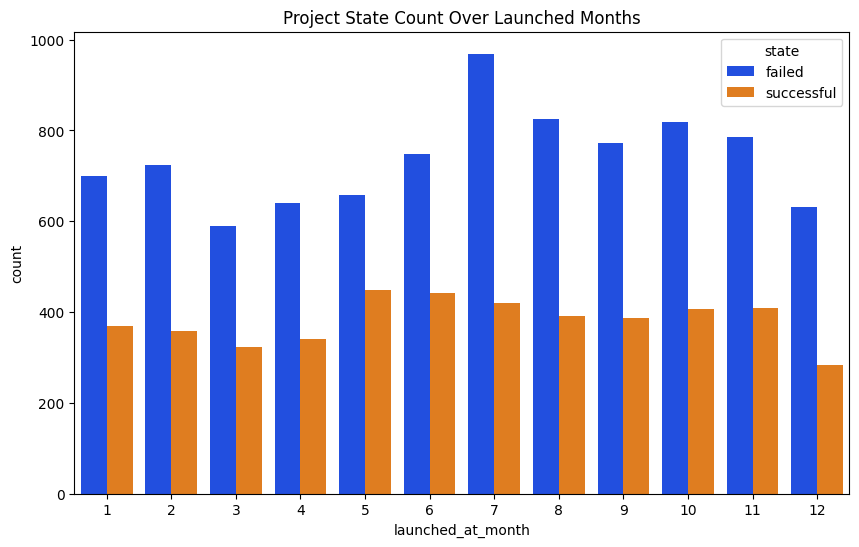

In [70]:
counts = df.groupby(['state','launched_at_month']).count()['id'].reset_index()
counts = counts.rename(columns={'id':'count'})
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='launched_at_month', y='count', hue='state', palette='bright')
plt.title('Project State Count Over Launched Months')
plt.show()

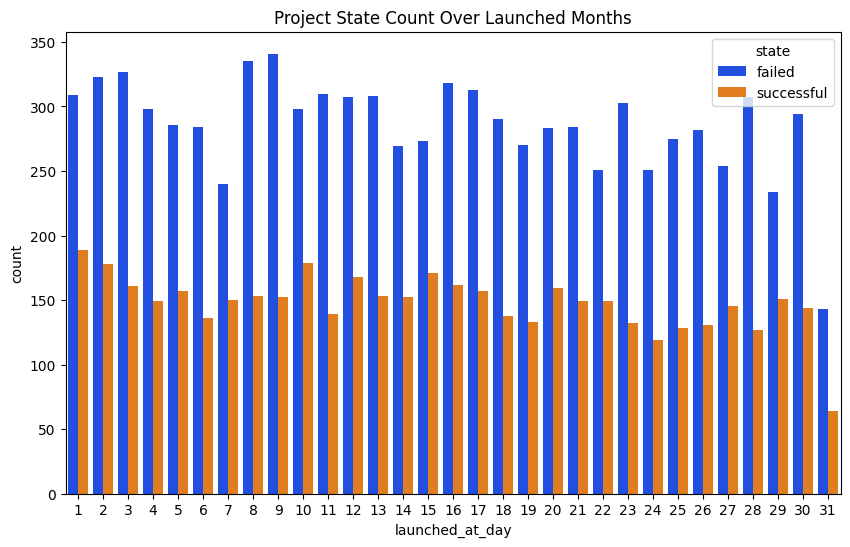

In [71]:
counts = df.groupby(['state','launched_at_day']).count()['id'].reset_index()
counts = counts.rename(columns={'id':'count'})
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='launched_at_day', y='count', hue='state', palette='bright')
plt.title('Project State Count Over Launched Months')
plt.show()

Doesn't look like the day of the launch matters...

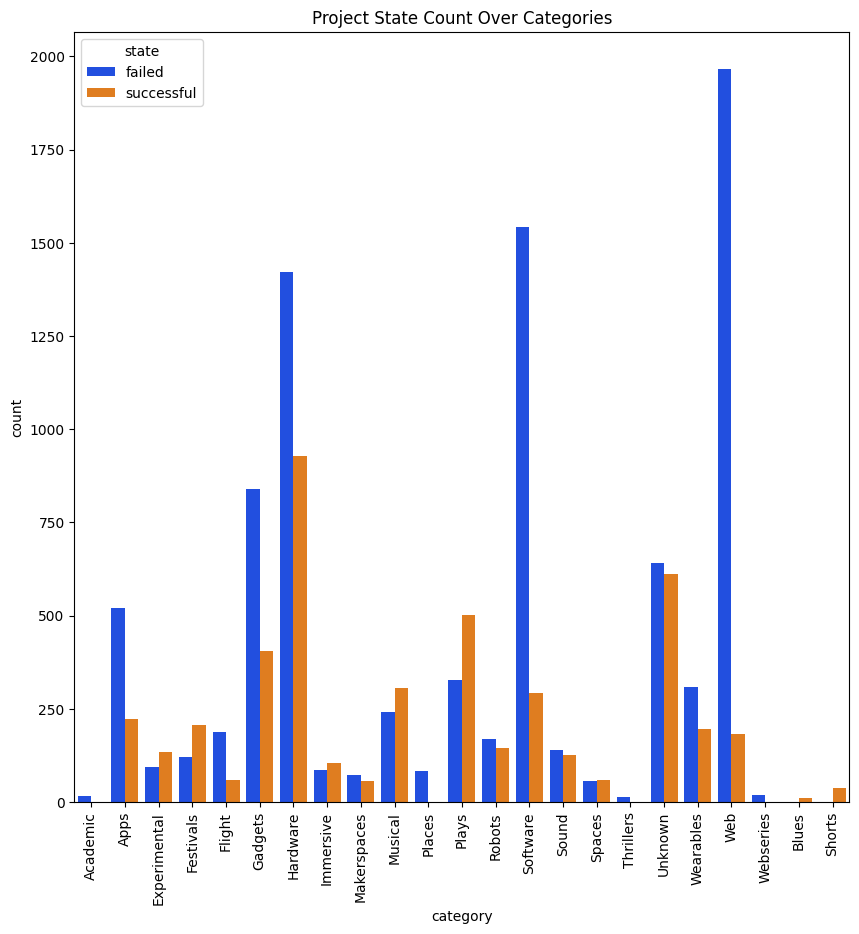

In [72]:
counts = df.groupby(['state','category']).count()['id'].reset_index()
counts = counts.rename(columns={'id':'count'})
plt.figure(figsize=(10, 10))
sns.barplot(data=counts, x='category', y='count', hue='state', palette='bright')
plt.title('Project State Count Over Categories')
plt.xticks(rotation=90)
plt.show()

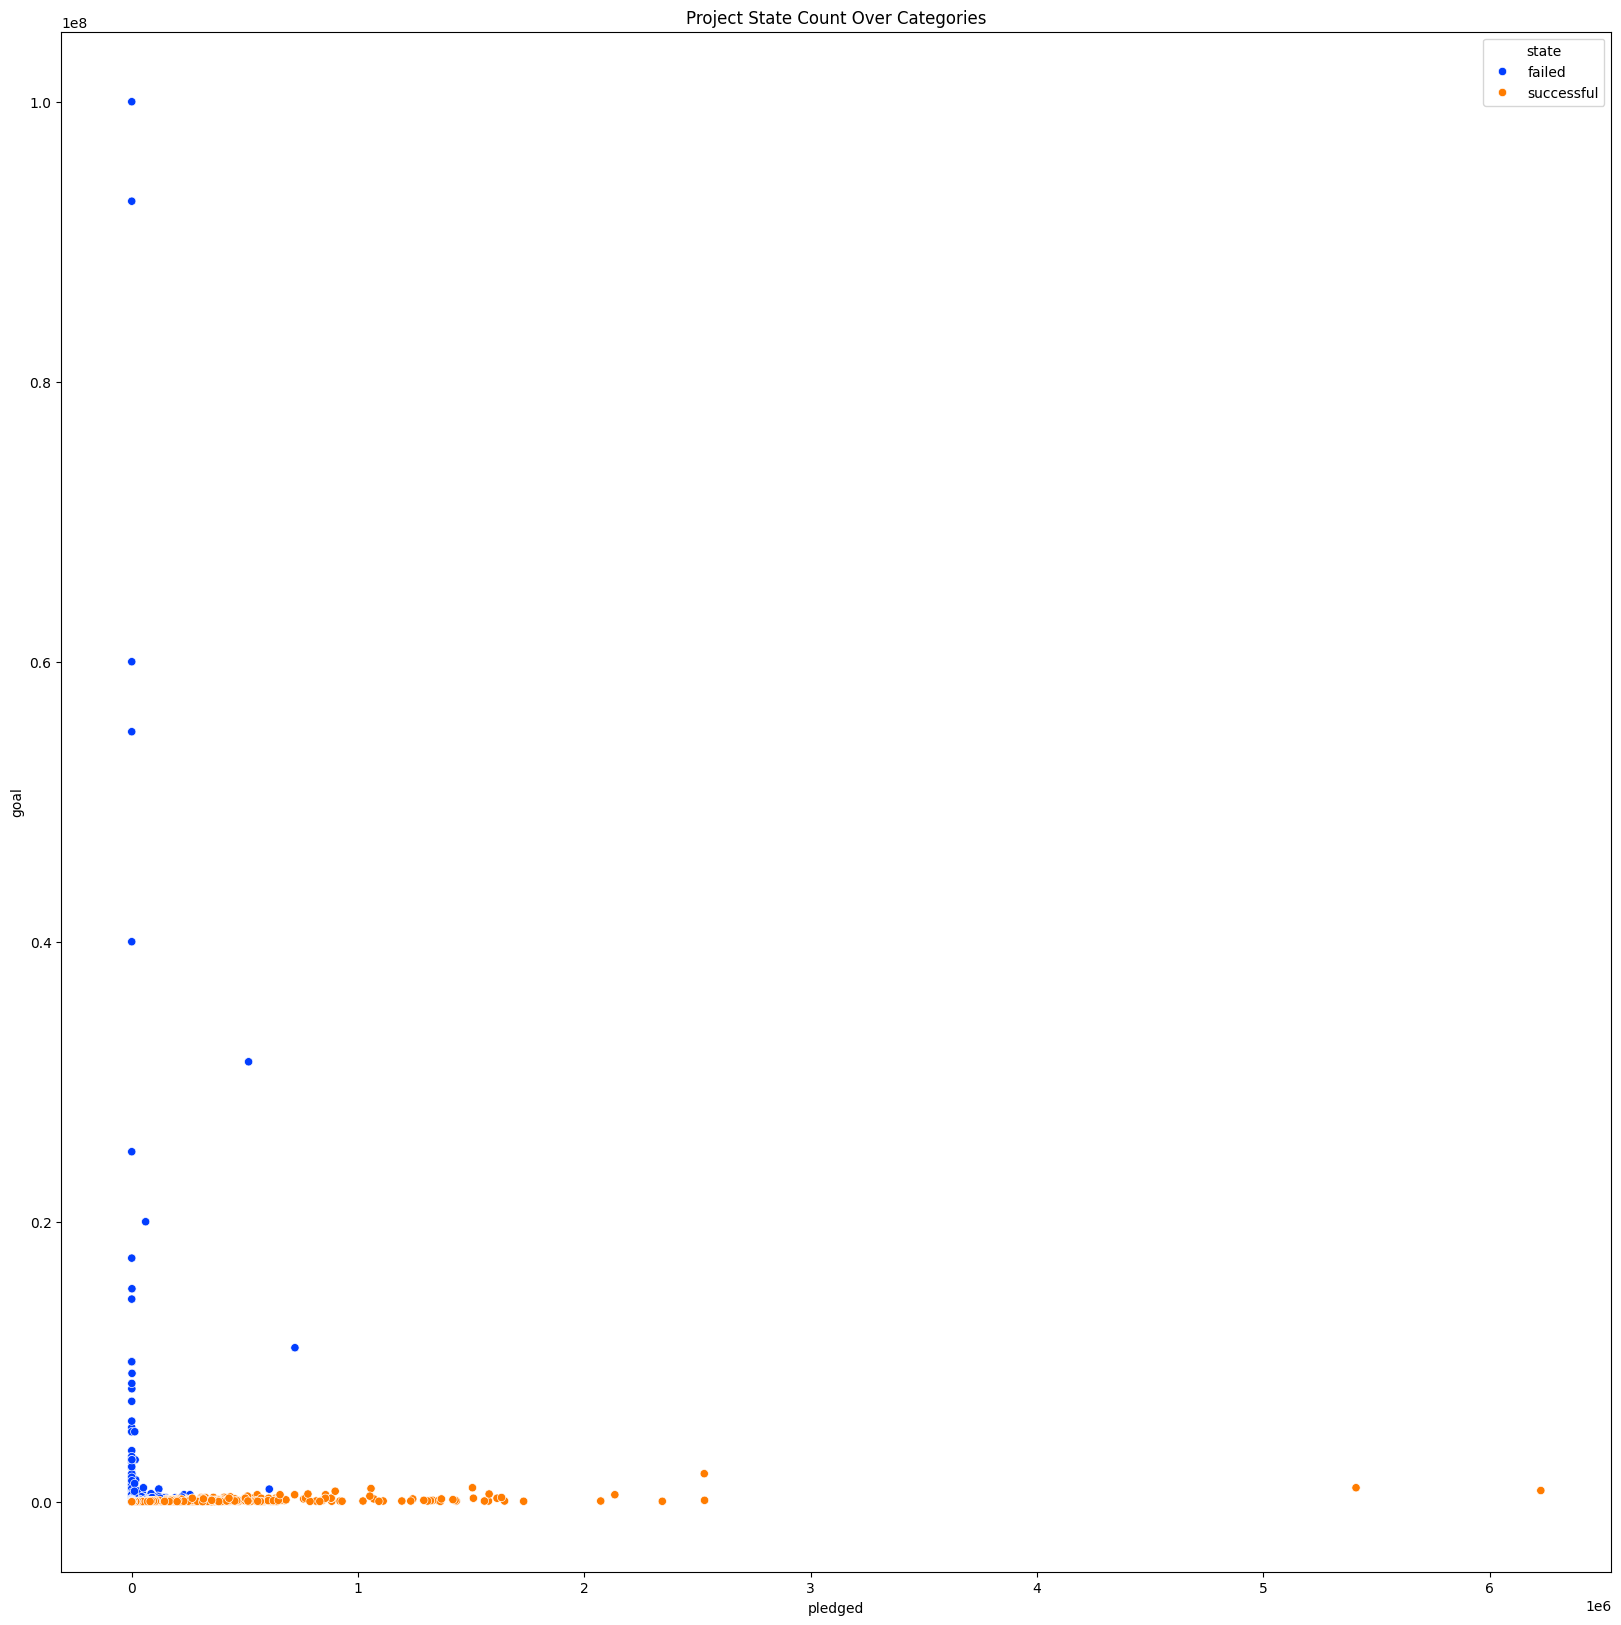

In [86]:
# counts = df.groupby(['state','category']).count()['id'].reset_index()
# counts = counts.rename(columns={'id':'count'})
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='pledged', y='goal', hue='state', palette='bright')
plt.title('Project State Count Over Categories')
# plt.xticks(rotation=90)
plt.show()

In [87]:
df['country'].value_counts()

country
US    9603
GB    1674
CA     705
AU     443
NL     208
DE     156
FR     129
IT      86
DK      76
NZ      71
ES      63
SE      60
IE      48
NO      36
CH      34
BE      21
AT      21
LU       1
Name: count, dtype: int64

In [73]:
# total = df.groupby(['category'])['usd_pledged'].sum().reset_index()
# count = df.groupby(['category'])['id'].count().reset_index()
# total['count'] = count['id']
# total.rename({"id": "count"}, axis=1, inplace=True)
# total['ratio'] = total['usd_pledged']/count['id']
# plt.figure(figsize=(10, 10))
# sns.barplot(data=total, x='category', y='ratio', hue='category', palette='bright')
# plt.title('Project categories Over Average Pledged in USD')
# plt.xticks(rotation=90)
# plt.show()


KeyError: 'Column not found: usd_pledged'

In [74]:
# total = df.groupby(['state'])['usd_pledged'].sum().reset_index()
# count = df.groupby(['state'])['id'].count().reset_index()
# total['count'] = count['id']
# total.rename({"id": "count"}, axis=1, inplace=True)
# total['ratio'] = total['usd_pledged']/count['id']
# plt.figure(figsize=(10, 10))
# sns.barplot(data=total, x='state', y='ratio', hue='state', palette='bright')
# plt.title('Project State Over Average Pledged in USD')
# plt.xticks(rotation=90)
# plt.show()


KeyError: 'Column not found: usd_pledged'

In [75]:
df.describe()

,id,goal,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,deadline_day,deadline_yr,deadline_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days
count,1.343500e+04,1.343500e+04,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000,13435.000000
mean,1.072567e+09,9.107229e+04,5.804466,5.147897,19.061035,13.069967,6.789133,15.671678,2014.353703,13.055899,6.534723,15.535541,2014.151321,12.877112,6.609081,15.305024,2014.275102,12.599107,46.746185,34.445032
std,6.156898e+08,1.520810e+06,2.835594,2.413875,4.545389,3.177685,3.411852,9.047913,1.128792,6.072346,3.301920,8.764973,1.137403,5.884579,3.356524,8.801823,1.123902,5.596640,101.006404,11.936018
min,1.645550e+05,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,1.000000
25%,5.489060e+08,3.500000e+03,3.000000,3.000000,17.000000,11.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,30.000000
50%,1.074059e+09,1.109928e+04,6.000000,5.000000,20.000000,13.000000,7.000000,15.000000,2015.000000,13.000000,7.000000,15.000000,2014.000000,13.000000,7.000000,15.000000,2015.000000,13.000000,14.000000,30.000000
75%,1.605931e+09,3.999950e+04,8.000000,7.000000,22.000000,15.000000,10.000000,23.000000,2015.000000,18.000000,9.000000,23.000000,2015.000000,17.000000,9.000000,23.000000,2015.000000,17.000000,43.000000,39.000000
max,2.147017e+09,1.000000e+08,16.000000,14.000000,35.000000,30.000000,12.000000,31.000000,2016.000000,23.000000,12.000000,31.000000,2016.000000,23.000000,12.000000,31.000000,2016.000000,23.000000,1528.000000,91.000000


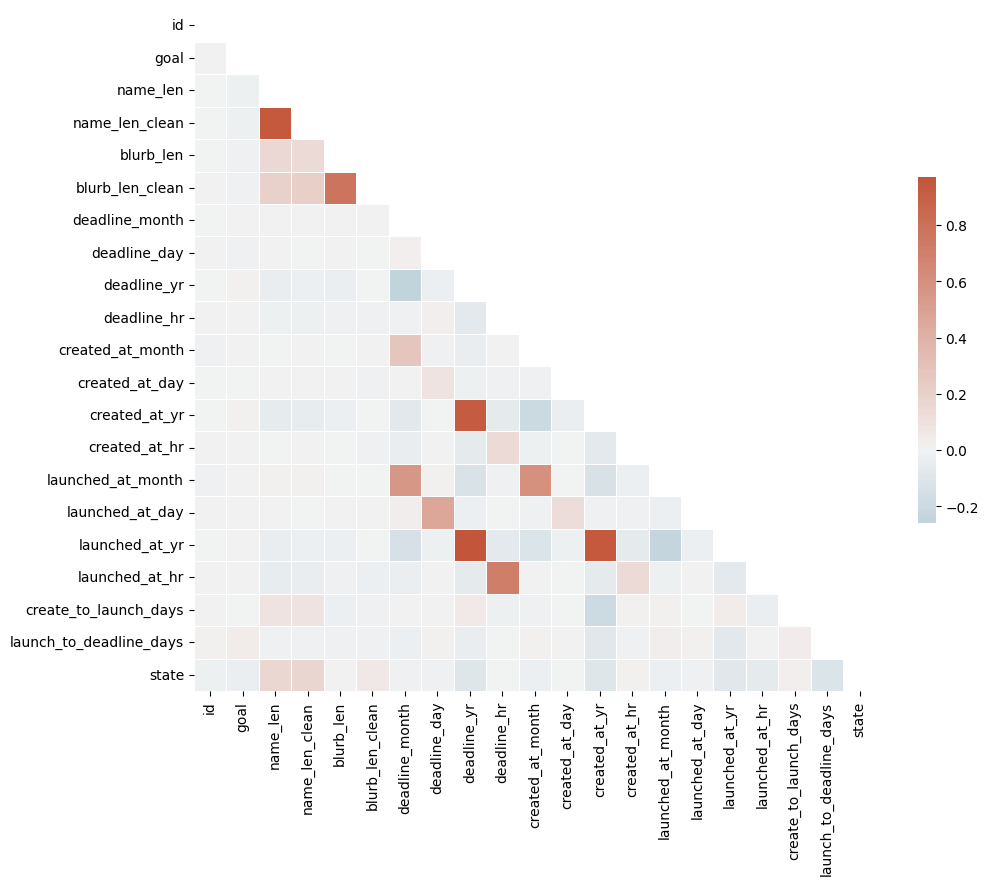

In [94]:
numerical_df = df.select_dtypes(include=[np.number])
numerical_df['state'] = pd.get_dummies(df['state'],drop_first=True)

corr = numerical_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [19]:
count = df.groupby('launched_at_weekday').count().reset_index()
sns.barplot(x='launched_at_weekday',y='goal',data=count)

KeyError: 'state_changed_at'

In [ ]:
count = df.groupby('created_at_weekday').count().reset_index()
sns.barplot(x='created_at_weekday',y='goal',data=count)

In [ ]:
count = df.groupby('deadline_weekday').count().reset_index()
sns.barplot(x='deadline_weekday',y='goal',data=count)

In [ ]:
# Pre-Processing
kickstarter_df = df.dropna()

# drop all name and id columns
kickstarter_df.drop(columns=['id', 'name'], axis=1, inplace=True)

# drop all columns that are directly indicative of prediction result
kickstarter_df.drop(columns=[
                    
                    ], axis=1, inplace=True)
kickstarter_df

In [ ]:
# Setup the variables
from sklearn.model_selection import train_test_split
X = kickstarter_df[["name_len", "blurb_len"]]
y = kickstarter_df["state"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=5)